In [1]:
from optiland.fileio import ZemaxFileReader
from optiland.optic import Optic
import optiland.backend as be

In [2]:
lens = ZemaxFileReader("tests/zemax_files/simple_fold_mirror_up.zmx").generate_lens()

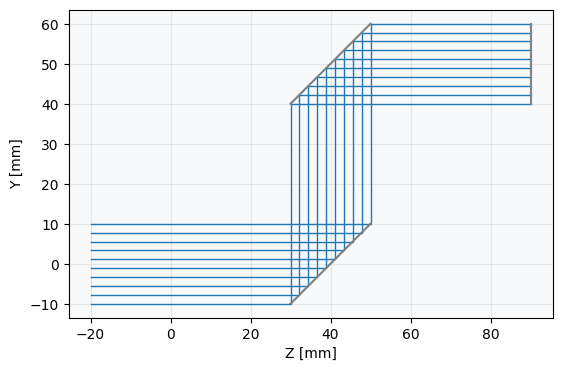

In [3]:
lens.draw(num_rays=10)

╒════╤═══════════════╤═══════════╤══════════╤═════════════╤════════════╤═════════╤═════════════════╕
│    │ Type          │ Comment   │   Radius │   Thickness │ Material   │   Conic │   Semi-aperture │
╞════╪═══════════════╪═══════════╪══════════╪═════════════╪════════════╪═════════╪═════════════════╡
│  0 │ Planar        │           │      inf │         inf │ Air        │       0 │              10 │
│  1 │ Planar        │           │      inf │          10 │ Air        │       0 │              10 │
│  2 │ Stop - Planar │           │      inf │          30 │ Air        │       0 │              10 │
│  3 │ Planar        │           │      inf │           0 │ Mirror     │       0 │              10 │
│  4 │ Planar        │           │      inf │          50 │ Mirror     │       0 │              10 │
│  5 │ Planar        │           │      inf │         nan │ Air        │       0 │              10 │
╘════╧═══════════════╧═══════════╧══════════╧═════════════╧════════════╧═════════╧═════════

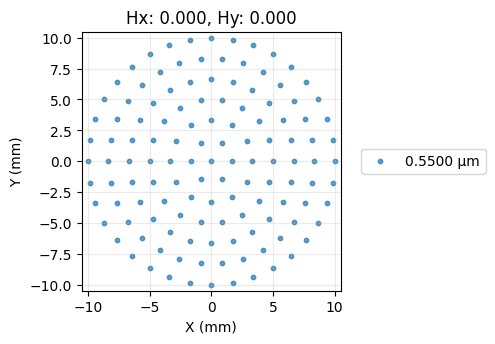

In [4]:
lens.info()
from optiland.analysis import SpotDiagram
sd = SpotDiagram(lens)
sd.view()

In [5]:
# this is correct
M1 = lens.surface_group.surfaces[3]
print(f"x={M1.geometry.cs.x} , y={M1.geometry.cs.y}, z={M1.geometry.cs.z}")

x=0.0 , y=0.0, z=40.0


In [6]:
# this is correct
M2 = lens.surface_group.surfaces[4]
print(f"x={M2.geometry.cs.x} , y={M2.geometry.cs.y}, z={M2.geometry.cs.z}")

x=0.0 , y=50.000000000000014, z=40.0


In [7]:
# this is correct
image_surface = lens.surface_group.surfaces[-1]
print(f"x={image_surface.geometry.cs.x} , y={image_surface.geometry.cs.y}, z={image_surface.geometry.cs.z}")
print(f"rx={image_surface.geometry.cs.rx}, ry={image_surface.geometry.cs.ry}, rz={image_surface.geometry.cs.rz}")


x=0.0 , y=50.00000000000002, z=90.00000000000001
rx=-5.5511151231257815e-17, ry=0.0, rz=0.0


now try with a different example

In [8]:
lens2 = ZemaxFileReader("tests/zemax_files/one_mirror_up_45deg.zmx").generate_lens()

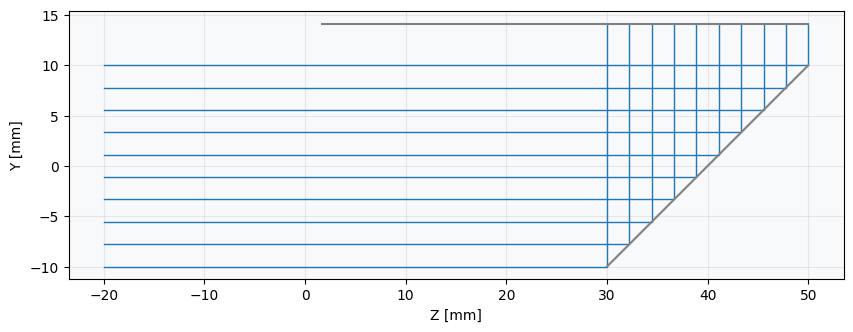

In [9]:
lens2.draw(num_rays=10)

!! it seems that the image surface is not correctly centered in the new optical axis. 

In [10]:
lens2.info()

╒════╤═══════════════╤═══════════╤══════════╤═════════════╤════════════╤═════════╤═════════════════╕
│    │ Type          │ Comment   │   Radius │   Thickness │ Material   │   Conic │   Semi-aperture │
╞════╪═══════════════╪═══════════╪══════════╪═════════════╪════════════╪═════════╪═════════════════╡
│  0 │ Planar        │           │      inf │    inf      │ Air        │       0 │              10 │
│  1 │ Planar        │           │      inf │     10      │ Air        │       0 │              10 │
│  2 │ Stop - Planar │           │      inf │     30      │ Air        │       0 │              10 │
│  3 │ Planar        │           │      inf │    -14.1421 │ Mirror     │       0 │              10 │
│  4 │ Planar        │           │      inf │    nan      │ Air        │       0 │              10 │
╘════╧═══════════════╧═══════════╧══════════╧═════════════╧════════════╧═════════╧═════════════════╛


!!! The last thickness is incorrect - it should be -20!